# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [118]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [119]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.

In [120]:
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [121]:
# Create a Beautiful Soup object
response = requests.get(url)
soup = soup(response.text, 'html')

In [122]:
# Extract all rows of data
find_table = soup.find(class_ = 'table')
table_rows = find_table.find_all('tr')

# Extract data from rows and store in a list of dictionaries
mars_temp_data = []
for row in table_rows:
    cells = row.find_all('td')
    if len(cells) > 1:
        entry = {
            'id': cells[0].get_text(),
            'terrestrial_date': cells[1].get_text(),
            'sol': cells[2].get_text(),
            'ls': cells[3].get_text(),
            'month': cells[4].get_text(),
            'min_temp': cells[5].get_text(),
            'pressure': cells[6].get_text(),
        }
        mars_temp_data.append(entry)

# Create a Pandas DataFrame
mars_df = pd.DataFrame(mars_temp_data)

mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.

In [123]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [124]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype(int)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [125]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [126]:
# 1. How many months are there on Mars?
mars_months = mars_df.groupby('month').size()
mars_months

# mars_temp_df['month'].max() = 12 martian months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
dtype: int64

In [127]:
# 2. How many Martian days' worth of data are there?
mars_days = mars_df['sol'].nunique()
mars_days


1867

In [128]:
# 3. What is the average low temperature by month?
avg_low = mars_df.groupby('month')['min_temp'].mean()
avg_low

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

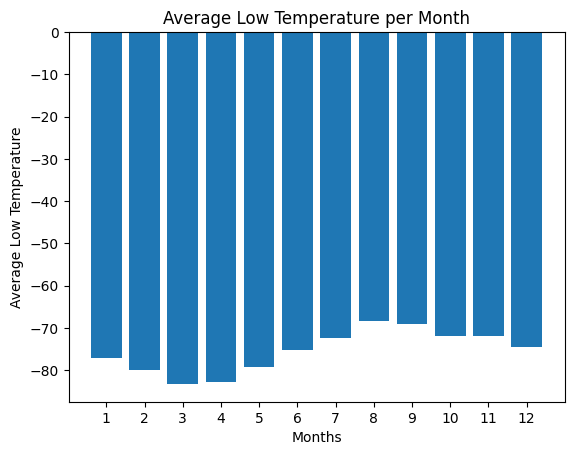

In [129]:
# Plot the average temperature by month

plt.bar(avg_low.index, avg_low.values)
plt.xlabel('Months')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature per Month')
plt.xticks(avg_low.index)
plt.show()


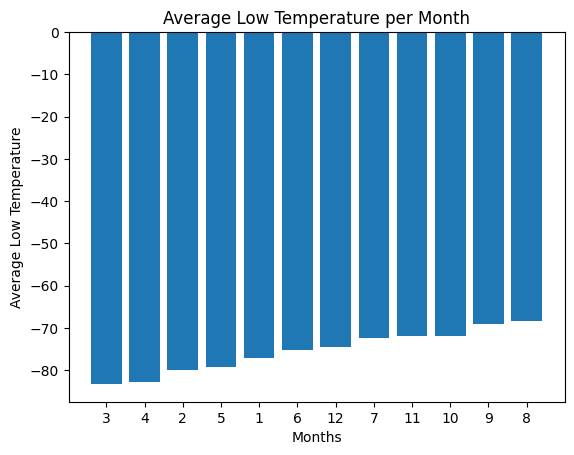

In [130]:
# Identify the coldest and hottest months in Curiosity's location
sorted_avg_low = avg_low.sort_values()

plt.bar(range(len(sorted_avg_low)), sorted_avg_low.values)
plt.xlabel('Months')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature per Month')
plt.xticks(range(len(sorted_avg_low)), sorted_avg_low.index)
plt.show()

In [131]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

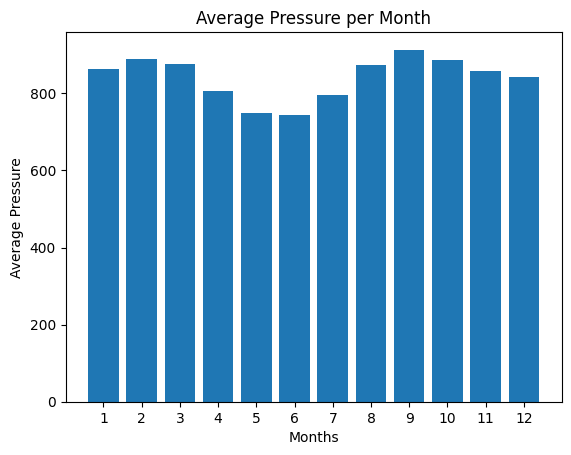

In [132]:
# Plot the average pressure by month

plt.bar(avg_pressure.index, avg_pressure.values)
plt.xlabel('Months')
plt.ylabel('Average Pressure')
plt.title('Average Pressure per Month')
plt.xticks(avg_pressure.index)
plt.show()

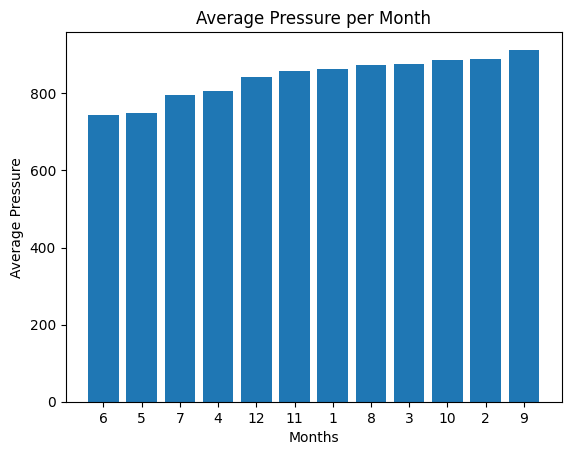

In [133]:
# Identify the lowest and highest pressures, arranged by month
sorted_avg_pressure = avg_pressure.sort_values()

plt.bar(range(len(sorted_avg_pressure)), sorted_avg_pressure.values)
plt.xlabel('Months')
plt.ylabel('Average Pressure')
plt.title('Average Pressure per Month')
plt.xticks(range(len(sorted_avg_pressure)), sorted_avg_pressure.index)
plt.show()

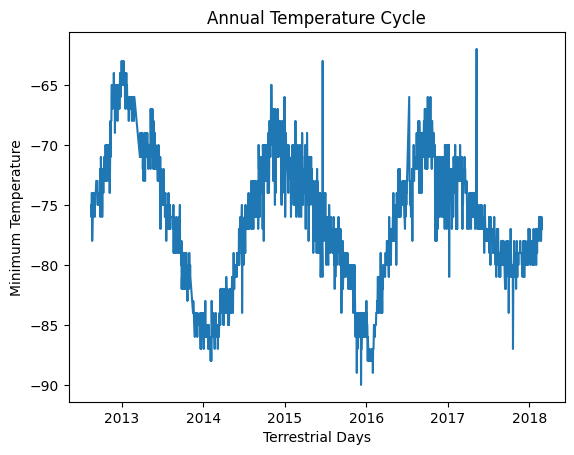

In [134]:
# 5. How many terrestrial (earth) days are there in a Martian year?


plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'])
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.title('Annual Temperature Cycle')

plt.show()


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [135]:
mars_df.to_csv('output_files/mars_curiosity.csv', index=False)

In [136]:
browser.quit

<bound method BaseWebDriver.quit of <splinter.driver.webdriver.chrome.WebDriver object at 0x117e65af0>>